Tratamento do Dataset

In [2]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

C:\Users\elisa\AppData\Local\Temp\ipykernel_12760\199825073.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data=pd.read_csv('train.csv') # dataset do projeto
unique_counts = data.nunique()
unique_counts # valores unicos para cada coluna
# data.head()
# data.tail()
#data.shape #(3207, 12)

brand             56
model           1670
model_year        34
milage          2325
fuel_type          7
engine          1015
transmission      54
ext_col          265
int_col          140
accident           2
clean_title        1
price           1332
dtype: int64

In [5]:
data['transmission'].unique()

array(['5-Speed A/T', 'A/T', 'CVT Transmission', '6-Speed A/T',
       '4-Speed A/T', 'Automatic', '5-Speed M/T',
       'Transmission w/Dual Shift Mode', '7-Speed A/T', '1-Speed A/T',
       '1-Speed Automatic', '6-Speed M/T', '10-Speed Automatic',
       '8-Speed A/T', '8-Speed Automatic', '6-Speed Automatic',
       '10-Speed A/T', '9-Speed A/T', 'Automatic CVT',
       '9-Speed Automatic', 'M/T', '7-Speed M/T', 'Variable',
       '6-Speed Automatic with Auto-Shift',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic', '2',
       '7-Speed DCT Automatic', '6-Speed Manual', '5-Speed Automatic',
       '–', 'Automatic, 8-Spd', '8-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O',
       'Transmission Overdrive Switch', 'SCHEDULED FOR OR IN PRODUCTION',
       'Single-Speed Fixed Gear',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes',
       '7-Speed Automatic', 'Automatic, 9-Spd 9G-Tronic',
       'Autom

In [4]:
data.info() #milage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   object
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 300.8+ KB


In [5]:
data.describe()

,model_year,price
count,3207.000000,3.207000e+03
mean,2015.517930,4.487024e+04
std,6.131963,8.382969e+04
min,1974.000000,2.000000e+03
25%,2012.000000,1.705000e+04
50%,2017.000000,3.169800e+04
75%,2020.000000,4.999650e+04
max,2024.000000,2.954083e+06


In [69]:
#modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

1974 2024


In [75]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [80]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   int64 
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 300.8+ KB


In [82]:
data.isnull().sum()
# utilizar algoritmo de arvore de decisão para preencher esses valores?

brand             0
model             0
model_year        0
milage            0
fuel_type       147
engine            0
transmission      0
ext_col           0
int_col           0
accident         89
clean_title     467
price             0
dtype: int64

In [8]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() #Yes-> 2740, os valores nulos só podem ser no( ou não se sabe)??

# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].value_counts() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
data['ext_col'].value_counts()# 11 -> nao se sabe
data['int_col'].value_counts() # 98 -> nao se sabe
for preco in data['price']: # tudo certo
    if not isinstance(preco, int):
        print('erro')

brand
Ford             311
BMW              304
Mercedes-Benz    251
Chevrolet        243
Porsche          163
Audi             146
Toyota           144
Lexus            131
Jeep             108
Land             107
Nissan            94
Cadillac          92
GMC               77
Tesla             75
RAM               74
Dodge             72
Kia               64
Honda             53
Mazda             52
Acura             52
Hyundai           52
Subaru            48
INFINITI          45
Lincoln           44
Volkswagen        43
Jaguar            37
Maserati          28
Bentley           28
MINI              27
Volvo             26
Chrysler          24
Lamborghini       22
Buick             21
Mitsubishi        18
Genesis           18
Alfa              16
Rivian            14
Pontiac           13
Hummer            12
Rolls-Royce        9
Aston              8
Ferrari            8
Saturn             5
FIAT               5
McLaren            5
Lotus              3
Scion              3
Saab   

In [10]:
data['brand'].count()

3207

In [108]:
data.describe()

,model_year,milage,price
count,3207.000000,3207.000000,3.207000e+03
mean,2015.517930,64594.983785,4.487024e+04
std,6.131963,52387.260707,8.382969e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23151.500000,1.705000e+04
50%,2017.000000,52253.000000,3.169800e+04
75%,2020.000000,93450.000000,4.999650e+04
max,2024.000000,405000.000000,2.954083e+06


#### BOXPLOT

model_year       Axes(0.125,0.11;0.227941x0.77)
milage        Axes(0.398529,0.11;0.227941x0.77)
price         Axes(0.672059,0.11;0.227941x0.77)
dtype: object

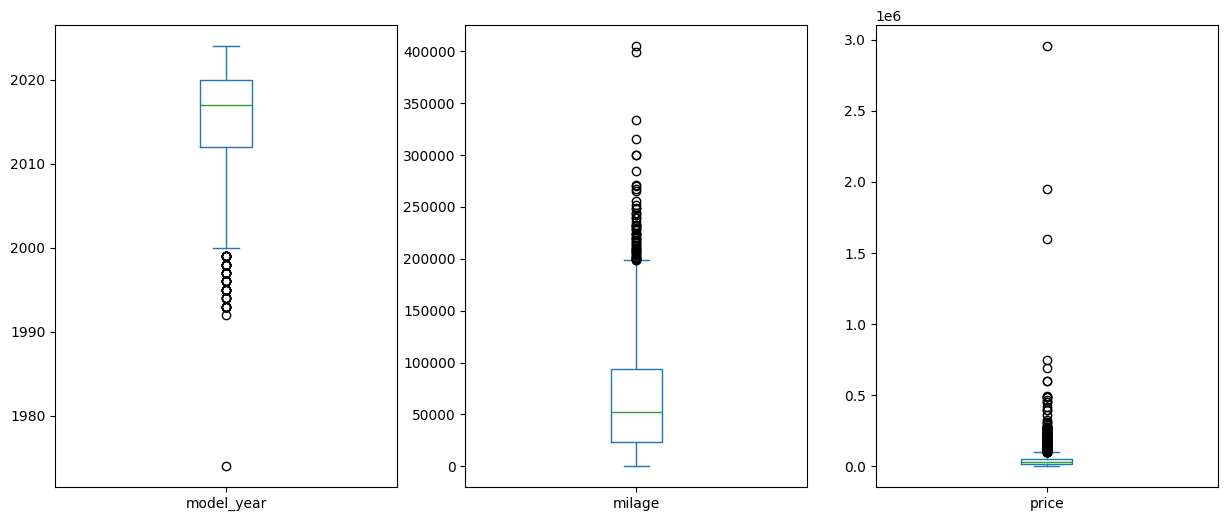

In [112]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [114]:
data[data['model_year']<1990] # outlier do 1º gráfico
data[data['milage']>350000] # outlier do 2º gráfico
data[data['price']>1500000] # 3º


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1650,Bugatti,Veyron 16.4 Grand Sport,2011,6330,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,None reported,Yes,1950995
2484,Maserati,Quattroporte Base,2005,32000,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,At least 1 accident or damage reported,Yes,2954083
2564,Porsche,Carrera GT Base,2005,4400,Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,1599000


#### BARPLOT

In [11]:
media_por_cor = data.groupby('ext_col')['price'].mean().sort_values(ascending=False)

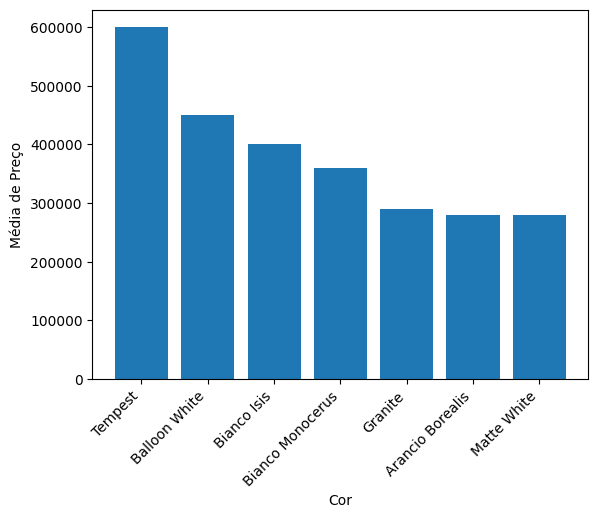

In [16]:
# 2. Selecionar as Top 5 Categorias
top_cores = media_por_cor.head(7)

# 3. Plotar o Gráfico de Barras
plt.bar(top_cores.index, top_cores.values)
plt.xlabel('Cor')
plt.ylabel('Média de Preço')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\elisa\AppData\Local\Temp\ipykernel_12760\1718396259.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\elisa\AppData\Local\Temp\ipykernel_12760\1718396259.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\elisa\AppData\Local\Temp\ipykernel_12760\1718396259.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\elisa\AppData\Local\Temp\ipykernel_12760\1718396259.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fi

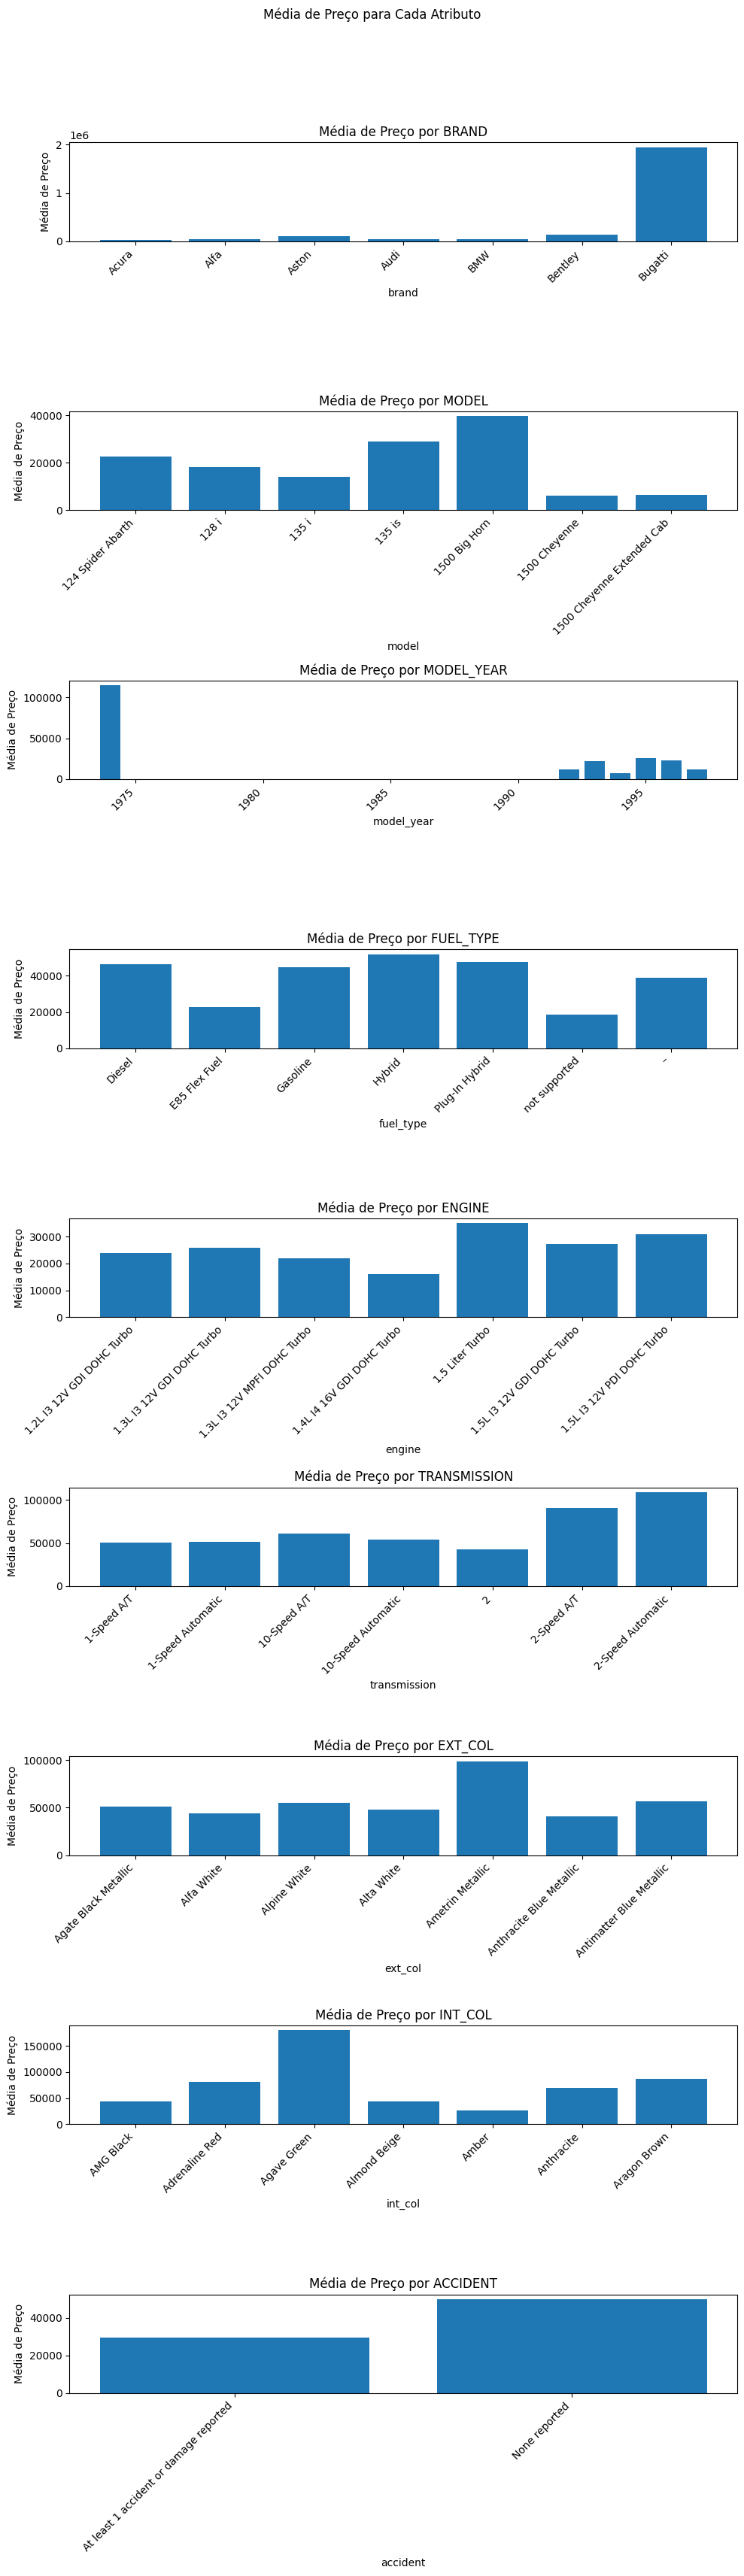

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'df' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)

# Lista para armazenar os gráficos gerados
colunas = ['brand',	'model', 'model_year',	'fuel_type',	'engine',	'transmission',	'ext_col',	'int_col',	'accident',	'clean_title']	
fig, axs = plt.subplots(len(colunas) - 1, 1, figsize=(10, 4 * (len(colunas) - 1)))
fig.suptitle('Média de Preço para Cada Atributo')

# Iterar sobre as colunas do DataFrame (exceto a última)
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.head(7)

    # Plotar o gráfico de barras para a média do preço por valor
    axs[i].bar(top.index, top.values)

    axs[i].set_title(f'Média de Preço por {column.upper()}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Média de Preço')

    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


#### SCATTER

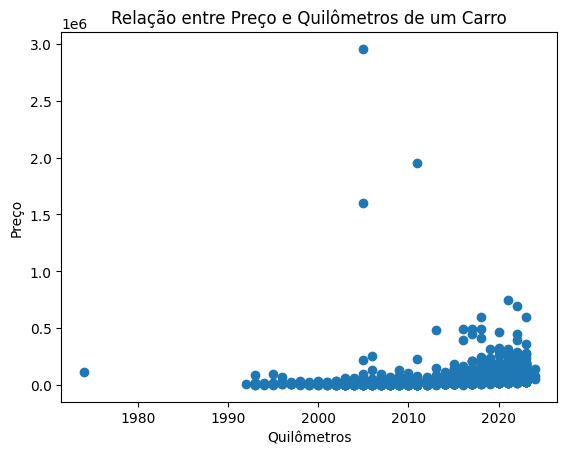

In [17]:
# Plotar um gráfico de dispersão
plt.scatter(data['model_year'], data['price'])

# Adicionar rótulos e título
plt.xlabel('Quilômetros')
plt.ylabel('Preço')
plt.title('Relação entre Preço e Quilômetros de um Carro')

# Exibir o gráfico
plt.show()

#### LINEPLOT

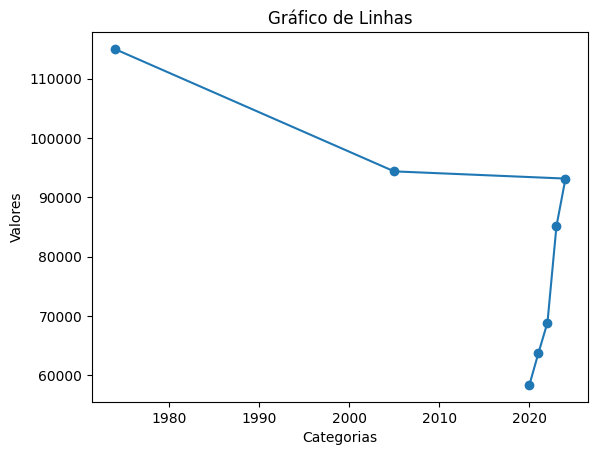

In [14]:
d = data.groupby('model_year')['price'].mean().sort_values(ascending=False)
d = d.head(7)
plt.plot(d.index, d.values, marker='o', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.title('Gráfico de Linhas')

# Exibir o gráfico
plt.show()